In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from IPython.display import Image


2023-06-02 13:32:26.316779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)
print(pd.__version__)
print(plt.__version__)

2.11.0
1.5.3
3.7.0


In [3]:
img_input=keras.Input(shape=(128,128,3),name='Image_Input')
info_input=keras.Input(shape=(1,),name='Information_Input')

In [4]:
h1_1=layers.Conv2D(64,5,strides=2,activation='relu',name='hidden1_1')(img_input)
h1_2=layers.Conv2D(32,5,strides=2,activation='relu',name='hidden1_2')(h1_1)

2023-06-02 13:32:28.286589: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 13:32:28.288811: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
h1_2_ft=layers.Flatten(name='flatten_1')(h1_2)

In [6]:
h1_3=layers.Dense(64,activation='relu',name='hidden1_3')(info_input)

In [7]:
concat=layers.Concatenate()([h1_2_ft,h1_3])

In [8]:
h2=layers.Dense(64,activation='relu',name='hidden2')(concat)

In [9]:
outputs=layers.Dense(1,activation='softmax',name='Output')(h2)

In [10]:
model=keras.Model(inputs=[img_input,info_input],outputs=outputs)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Image_Input (InputLayer)       [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 hidden1_1 (Conv2D)             (None, 62, 62, 64)   4864        ['Image_Input[0][0]']            
                                                                                                  
 hidden1_2 (Conv2D)             (None, 29, 29, 32)   51232       ['hidden1_1[0][0]']              
                                                                                                  
 Information_Input (InputLayer)  [(None, 1)]         0           []                           

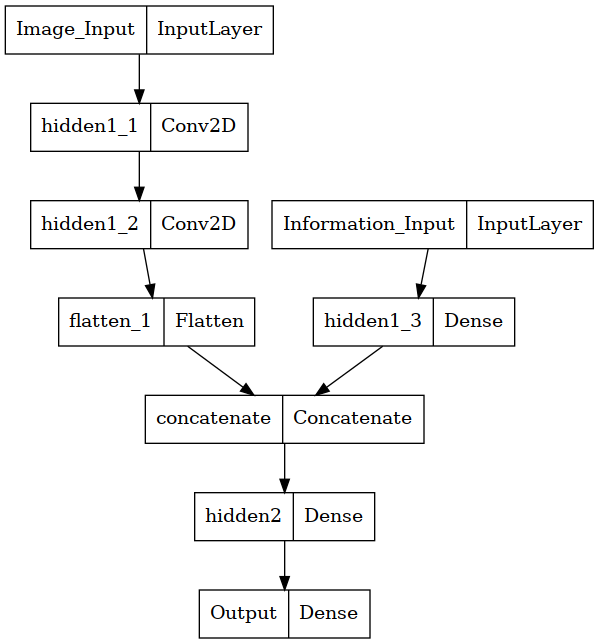

In [12]:
plot_model(model,to_file='Functional_model_multi.png')

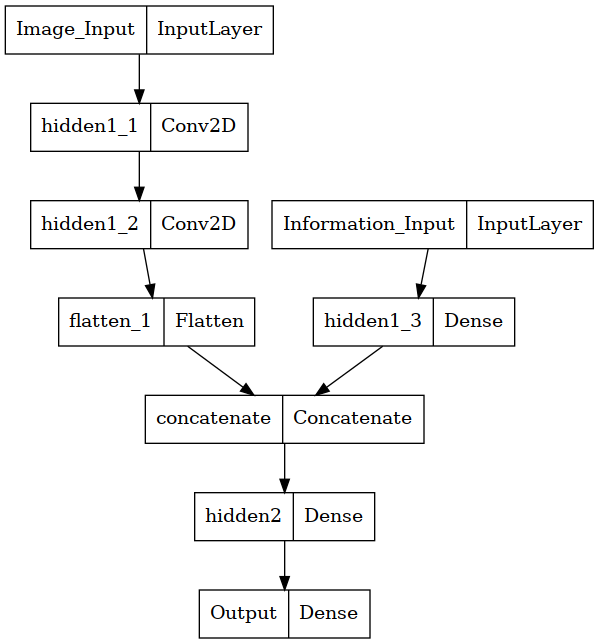

In [13]:
Image('Functional_model_multi.png')